In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
import os
import random
import math
import cv2
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
meta_df = pd.read_csv("Meta.csv")
print(meta_df.shape)
meta_df.head()

(43, 5)


,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [3]:
train_df = pd.read_csv("Train.csv")
print(train_df.shape)
train_df.head()

(39209, 8)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [4]:
test_df = pd.read_csv("Test.csv")
print(test_df.shape)
test_df.head()

(12630, 8)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


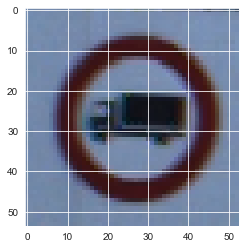

In [5]:
image1 = mpimg.imread("Test/00000.png")
plt.figure()
plt.imshow(image1)

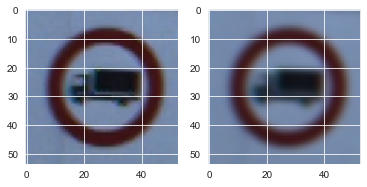

In [6]:
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.subplot(1, 2, 2)
image11 = cv2.GaussianBlur(image1, (5, 5), 0)
image11 = np.array(image11, dtype="float")
plt.imshow(image11)

In [7]:
train_images_path = train_df["Path"].values.tolist()[:2000]
train_labels = train_df["ClassId"].values.tolist()[:2000]
test_images_path = test_df["Path"].values.tolist()
test_labels = test_df["ClassId"].values.tolist()

In [8]:
test_label_dic = {}
for i in test_labels:
    if i in test_label_dic.keys():
        test_label_dic[i] = test_label_dic[i] + 1
    else:
        test_label_dic[i] = 0

print(test_label_dic)

{16: 149, 1: 719, 38: 689, 33: 209, 11: 419, 18: 389, 12: 689, 25: 479, 35: 389, 7: 449, 23: 149, 4: 659, 9: 479, 21: 89, 20: 89, 27: 59, 3: 449, 13: 719, 10: 659, 5: 629, 17: 359, 34: 119, 2: 749, 8: 449, 30: 149, 24: 89, 15: 209, 26: 179, 28: 149, 22: 119, 14: 269, 32: 59, 29: 89, 6: 149, 36: 119, 40: 89, 41: 59, 31: 269, 19: 59, 0: 59, 39: 89, 42: 89, 37: 59}


In [10]:
print(np.array(mpimg.imread(train_images_path[0])).shape)
print(np.array(mpimg.imread(train_images_path[1])).shape)
print(np.array(mpimg.imread(test_images_path[0])).shape)
print(np.array(mpimg.imread(test_images_path[1])).shape)

(26, 27, 3)
(27, 28, 3)
(54, 53, 3)
(45, 42, 3)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


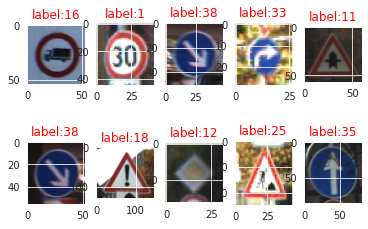

In [11]:
demo_images = []
demo_labels = []
for i in range(10):
    demo_images.append(test_images_path[i])
    demo_labels.append(test_labels[i])

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image=mpimg.imread(demo_images[i])
    plt.imshow(image)
    class_name=demo_labels[i]
    plt.title("label:" + str(class_name), color='red', fontsize=12)
plt.show()

[ WARN:0@24.517] global /Users/runner/work/opencv-python/opencv-python/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


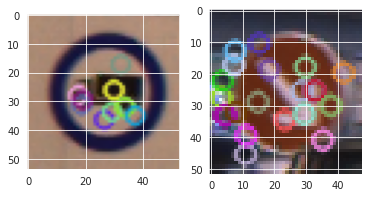

In [12]:
sift = cv2.xfeatures2d.SIFT_create()
image1 = cv2.imread('Test/00000.png')
image2 = cv2.imread('Test/00002.png')
kp1, des1 = sift.detectAndCompute(image1, None)
kp2, des2 = sift.detectAndCompute(image2, None)

kp_image1 = cv2.drawKeypoints(image1, kp1, None)
kp_image2 = cv2.drawKeypoints(image2, kp2, None)

plt.subplot(1, 2, 1)
plt.imshow(kp_image1)
plt.savefig('image_show1.png', dpi = 300)
plt.subplot(1, 2, 2)
plt.imshow(kp_image2)
plt.savefig('image_show2.png', dpi = 300)

In [13]:
des1.shape

(11, 128)

In [14]:
des2.shape

(25, 128)

In [15]:
def stack(arr):
    a, b = arr.shape
    for col in range(b):
        arr[0, col] = sum(arr[:,col])
    arr.reshape(-1, 1)
    return arr[0]

In [16]:
des1 = stack(des1)
des1.shape

(128,)

In [17]:
des2 = stack(des2)
des2.shape

(128,)

In [18]:
print("key point num:", len(kp1))

for i in range(2):
    print("key point:", i)
    print("type:", type(kp1[i]))
    print("postion:", kp1[i].pt)
    print("size:", kp1[i].size)
    print("director:", kp1[i].angle)
    print("octave group:", kp1[i].octave)

print("description shape:", des1.shape)
for i in range(2):
    print("desc:", i)
    print(np.array(des1[i]).shape)

key point num: 11
key point: 0
type: <class 'cv2.KeyPoint'>
postion: (17.288515090942383, 27.9813232421875)
size: 2.1263630390167236
director: 254.7862548828125
octave group: 12190207
key point: 1
type: <class 'cv2.KeyPoint'>
postion: (18.44927215576172, 31.377504348754883)
size: 2.3434040546417236
director: 73.9451904296875
octave group: 2556671
description shape: (128,)
desc: 0
()
desc: 1
()


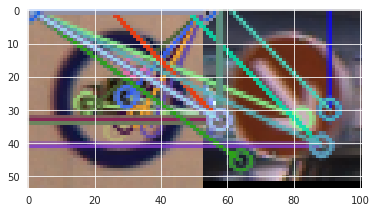

In [19]:
ratio = 0.85
matcher = cv2.BFMatcher()
raw_matches = matcher.knnMatch(des1, des2, k = 2)
good_matches = []
for m1, m2 in raw_matches:
    if m1.distance < ratio * m2.distance:
        good_matches.append([m1])
matches = cv2.drawMatchesKnn(image1, kp1, image2, kp2, good_matches, None, flags = 2)

plt.figure()
plt.imshow(matches)
plt.savefig('template_matche.png', dpi = 300)

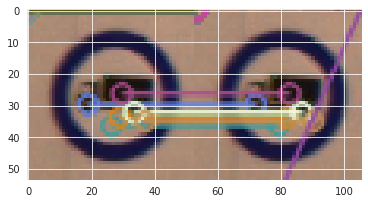

In [20]:
ratio = 0.85
matcher = cv2.BFMatcher()
raw_matches = matcher.knnMatch(des1, des1, k = 2)
good_matches = []
for m1, m2 in raw_matches:
    if m1.distance < ratio * m2.distance:
        good_matches.append([m1])
matches = cv2.drawMatchesKnn(image1, kp1, image1, kp1, good_matches, None, flags = 2)

plt.figure()
plt.imshow(matches)
plt.savefig('template_matche2.png', dpi = 300)

In [21]:
sift = cv2.xfeatures2d.SIFT_create()
train_data = []
train_label = []
test_data = []
test_label = []
for i in range(len(train_images_path)):
    image = cv2.imread(train_images_path[i])
    kp, des = sift.detectAndCompute(image, None)
    if des  is None:
        continue
    else:
        des = stack(des)
        train_data.append(np.squeeze(des))
        train_label.append(train_labels[i])

for j in range(len(test_images_path)):
    image = cv2.imread(test_images_path[j])
    kp, des = sift.detectAndCompute(image, None)
    if des  is None:
        continue
    else:
        des = stack(des)
        test_data.append(np.squeeze(des))
        test_label.append(test_labels[j])

In [22]:
np.savez('train_data', train_data)
np.savez('train_label', train_label)
np.savez('test_data', test_data)
np.savez('test_label', test_label)

In [23]:
train_data = np.array(train_data)
train_data.shape

(1885, 128)

In [24]:
test_data = np.array(test_data)
test_data.shape

(11664, 128)

In [25]:
def pca_model(data, n_dim):
    data = data - np.mean(data, axis=0, keepdims=True)
    XTX = np.dot(data.T, data) 
    eig_values, eig_vector = np.linalg.eig(XTX)   
    indexs_ = np.argsort(-eig_values)[:n_dim]
    picked_eig_vector = eig_vector[:, indexs_]
    
    data_ndim = np.dot(data, picked_eig_vector)
    return data_ndim, picked_eig_vector

In [26]:
train_data_ndim, train_picked_eig_vector = pca_model(train_data, 2)
test_data_ndim, test_picked_eig_vector = pca_model(test_data, 2)

In [27]:
train_data_ndim.shape

(1885, 2)

In [28]:
train_picked_eig_vector.shape

(128, 2)

In [29]:
# Helper funcion on Euclidean Distance computation
def calc_distance(train, center, k):
    dist1 = []
    for data in train:
        diff = np.tile(data, (k,1)) - center
        squaredDiff = diff ** 2  
        squaredDist = np.sum(squaredDiff, axis=1) 
        distance = squaredDist ** 0.5 
        dist1.append(distance)
    dist = np.array(dist1)
    return dist

In [30]:
# Update Cluster Center
def classify(train, center, k):
    dist = calc_distance(train, center, k) 
    minDistIndices = np.argmin(dist, axis=1)  
    newcenter = pd.DataFrame(train).groupby(minDistIndices).mean() 
    newcenter = newcenter.values  
 
    changed = newcenter - center
 
    return changed, newcenter

In [31]:
# KNN Model Setup
dic = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0,
          10:0, 11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0,
          20:0, 21:0, 22:0, 23:0, 24:0, 25:0, 26:0, 27:0, 28:0, 29:0,
          30:0, 31:0, 32:0, 33:0, 34:0, 35:0, 36:0, 37:0, 38:0, 39:0, 40:0, 42:0}

label_predict_record = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0,
          10:0, 11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 19:0,
          20:0, 21:0, 22:0, 23:0, 24:0, 25:0, 26:0, 27:0, 28:0, 29:0,
          30:0, 31:0, 32:0, 33:0, 34:0, 35:0, 36:0, 37:0, 38:0, 39:0, 40:0, 42:0}

def knn_model(train, label, k):
    n = len(train)
    classes = list(np.zeros(n))
    center = random.sample(list(train), k)
 
    changed, newcenter = classify(train, center, k)
    while np.any(changed != 0):
        changed, newcenter = classify(train, newcenter, k)
 
    center = sorted(newcenter.tolist())
 
    dist = calc_distance(train, center, k)  
    minDistIndices = np.argmin(dist, axis=1)
    for i, j in enumerate(minDistIndices):
        classes[i] = j
    vote = list([])
    for i in range(k):
        vote.append(np.zeros(k))
    for i in classes:
        vote[classes[i]][label[i]] += 1  
    for i in range(k):
        index = list(vote[i]).index(max(vote[i]))
        dic[i] = index 
    n_wrong = 0
    for i in classes:
        if label[i] != dic[classes[i]]:
            n_wrong += 1 
        else:
            if dic[classes[i]] in label_predict_record.keys():
                label_predict_record[dic[classes[i]]] = label_predict_record[dic[classes[i]]] + 1
 
    acc = 1 - n_wrong/n
    return acc, center

In [32]:
train_acc, train_center = knn_model(list(train_data), list(train_label), 42)
print("trainSet predict acc on KNN model is: " + str(train_acc))

trainSet predict acc on KNN model is: 1.0


In [33]:
test_acc, test_center = knn_model(list(test_data), list(test_label), 43)
print("testSet predict acc on KNN model is: " + str(test_acc))

testSet predict acc on KNN model is: 0.8281035665294925


In [34]:
np.array(train_center).shape

(42, 128)

In [35]:
train_center_ndim, train_center_picked_eig_vector = pca_model(train_center, 2)

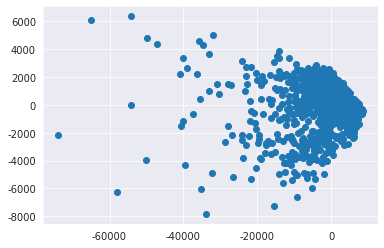

In [36]:
plt.scatter(train_data_ndim[:,0], train_data_ndim[:,1])
plt.show()

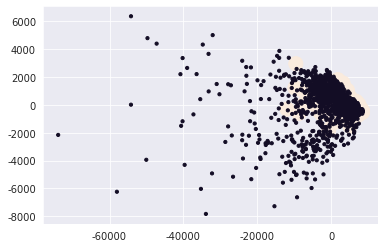

In [37]:
plt.scatter(train_data_ndim[:,0], train_data_ndim[:,1], 
            10*np.array(train_label), np.array(train_label))
plt.show()

In [39]:
res = []
r = 0
for k, v in label_predict_record.items():
    k = int(k)
    j = 0
    try:
        test_label_dic[k]
    except Exception as e:
        print(e)    
        r = k
    try:
        if test_label_dic[k] == 0:
            j = 0
        else:
            j = float(label_predict_record[k]) / test_label_dic[k]
            if j > 1:
                j = 1
        res.append(j)
    except Exception as e:
        print(e)

In [40]:
res.insert(r, 0)
print(len(res))

43


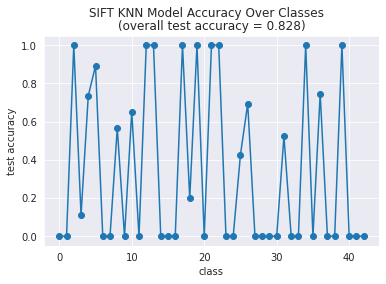

In [44]:
x = list(range(43))
y = res
plt.title('(overall test accuracy = 0.828)')
plt.xlabel('class')
plt.ylabel('test accuracy')
plt.suptitle("SIFT KNN Model Accuracy Over Classes")

plt.subplots_adjust(bottom=0.15)
plt.plot(x, y, marker='o')
plt.show()